<a href="https://colab.research.google.com/github/jnsbrdbr/NLP/blob/master/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('/content/drive/MyDrive/Sentiments.csv')

data

,comment,sentiment
0,کس میدونه چه جوری از این ها میشه شکایت کرد لطف...,Negative
1,اف بر شهرداری که درخت را وسط میدان انداخته. طر...,Negative
2,خیلی جای بکری هس حتما یه سر برید👌,Positive
3,آب بسیار کثیف است، متراژ هم کم,Negative
4,افتضاح چون یه شماره تماس نداره خیرسرش,Negative
...,...,...
2538,اصلا کیفیت نداره از سر مجبوری اومدیم اتاق کثیف...,Negative
2539,بسیار عالی بدون سردرد,Positive
2540,برای زیارت و استراحتی کوتاه خوبه در ضمن کتاب ف...,Positive
2541,جای خوبی نیست .یه دونه کافی شاپ امیر شکلات بود...,Negative


In [3]:
lable_count=data["sentiment"].value_counts()
lable_count

Negative    1159
Positive     938
Neutral      446
Name: sentiment, dtype: int64

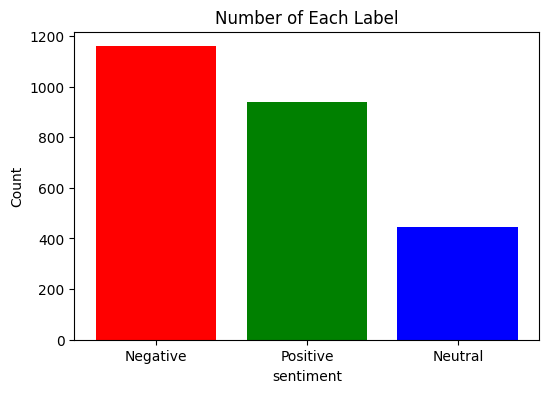

In [4]:
plt.figure(figsize=(6,4))
plt.bar(lable_count.index,lable_count.values,color=['red', 'green' , 'blue'])
plt.xlabel('sentiment')
plt.ylabel('Count')
plt.title('Number of Each Label')
plt.show()

In [5]:
#check for missing value
missing_value=data.isnull().sum()
missing_value

comment      0
sentiment    0
dtype: int64

In [6]:
blanks=[]
for i,comment,sentiment in data.itertuples():
  if comment.isspace():
    blanks.append(i)

print(len(blanks),"   |    ", 'blanks: ', blanks , )

0    |     blanks:  []


In [7]:
!pip install hazm

In [8]:
import hazm
stopwords = hazm.stopwords_list()
lemmatizer = hazm.Lemmatizer()
normalizer = hazm.Normalizer()

In [9]:
def preprocess_text(messy_string):
    assert(type(messy_string) == str)

    # Normalize, tokenize, remove stopwords, lemmatize, and rejoin
    cleaned = ' '.join([
        lemmatizer.lemmatize(word)
        for word in normalizer.normalize(messy_string).split()
        if word not in stopwords
    ])

    return cleaned


In [10]:
data['comment'] = data['comment'].apply(preprocess_text)

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

text_processing_pipeline=Pipeline([
    ('vectorize', CountVectorizer()),
    ('TF-IDF', TfidfTransformer())
])

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data["comment"], data["sentiment"], test_size=0.3, random_state=42)

In [13]:
X_train = text_processing_pipeline.fit_transform(X_train)
X_test = text_processing_pipeline.transform(X_test)

In [14]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [15]:
# Define a dictionary of classifiers for easier referencing and potential scalability
classifiers = {
    "SVC": SVC(kernel='linear'),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42),
    "MultinomialNB": MultinomialNB()
}

# Iterate over each classifier and print report
for classifier_name, classifier_obj in classifiers.items():
    # Fit the model
    classifier_obj.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier_obj.predict(X_test)

    # Generate classification report
    report = classification_report(y_test, y_pred)

    # Print the classification report
    print(f'Classification report for {classifier_name}: ')
    print(report)
    print("--------------------------------------------")

Classification report for SVC: 
              precision    recall  f1-score   support

    Negative       0.82      0.85      0.83       370
     Neutral       0.60      0.50      0.55       112
    Positive       0.81      0.82      0.81       281

    accuracy                           0.79       763
   macro avg       0.74      0.72      0.73       763
weighted avg       0.78      0.79      0.78       763

--------------------------------------------
Classification report for RandomForest: 
              precision    recall  f1-score   support

    Negative       0.84      0.73      0.78       370
     Neutral       0.54      0.36      0.43       112
    Positive       0.66      0.86      0.75       281

    accuracy                           0.72       763
   macro avg       0.68      0.65      0.65       763
weighted avg       0.73      0.72      0.72       763

--------------------------------------------
Classification report for LogisticRegression: 
              precision    r

In [17]:
data.iloc[670]

comment      رفتن دانشکده الهیات معارف بوستان مفتح ضلع شمال...
sentiment                                              Neutral
Name: 670, dtype: object

In [19]:
# Test the model with a custom email

comment = data.iloc[670]['comment']

custom_comment = text_processing_pipeline.transform([comment])

print(classifiers["SVC"].predict(custom_comment))

['Neutral']
